# 4. Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습(로지스틱 회귀 모델)

In [3]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을때 예측?

In [4]:
classifier.predict([[6]])

array([1], dtype=int64)

In [7]:
classifier.predict_proba([[6]]) # [0나올 확률, 1나올 확률]

array([[0.14150735, 0.85849265]])

### 분류 결과 예측 (테스트 세트)

In [11]:
y_pred = classifier.predict(X_test)
y_pred # 예측 값

array([1, 0, 1, 1], dtype=int64)

In [12]:
y_test # 실제 값

array([1, 0, 1, 0], dtype=int64)

In [13]:
X_test # 공부 시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [14]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에 분류 예측을 맞춘 개수 3/4

0.75

### 데이터 시각화

In [15]:
X_range = np.arange(min(X), max(X), 0.1) # X의최소값에서 최대값으로 0.1단위로 자르기
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) 
        # 1 / (1+e^-y) 에서 y = mx + b 
        # m = coef_ (기울기), b = intercept_ (절편)

In [19]:
p.shape # (1, 95)

(1, 95)

In [20]:
p = p.reshape(-1) # (95,)

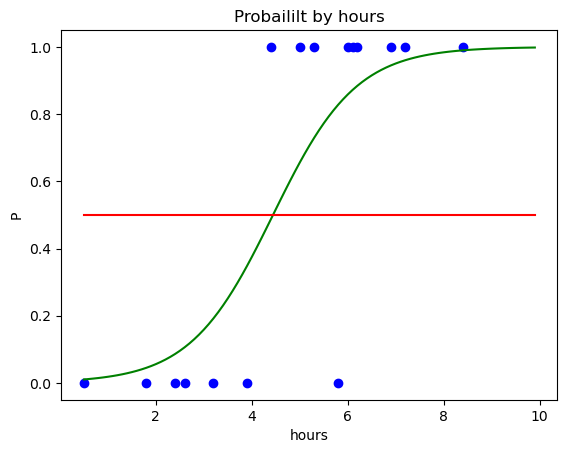

In [23]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 길이로 0.5를 채운 배열 생성
plt.title('Probaililt by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

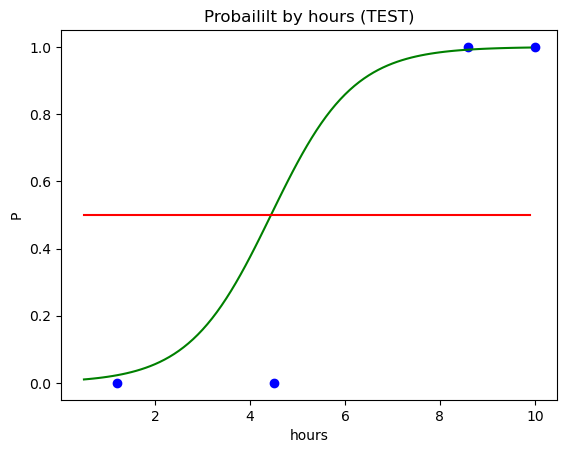

In [24]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 길이로 0.5를 채운 배열 생성
plt.title('Probaililt by hours (TEST)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 혼동 행렬 (Confusion Matrix)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#   예측    불합격                           합격
# 실제
# 불합격    불합격이라 예측했는데 불합격(TN)  합격이라 예측했는데 불합격 (FP)
# 합격      불합격이라 예측했는데 합격  (FN)  합격이라 예측했는데 합격   (TP)

array([[1, 1],
       [0, 2]], dtype=int64)